# **Creación de data tabular de la señales fisiológicas obtenidas en los laboratorios**

Las ondas son el producto de acción que se producen durante la estimulación cardiaca y se repiten de un latido a otro,por lo cual tienen las siguientes caracteristicas:
-La primera deflexión negativa va después de la onda Q,que dura menos de 0.03 segundos y abarca menos de 25% de la amplitud de la onda R.Luego la primera deflexión positiva posterior a la onda P es la onda R y la onda S es la primera deflexión negativa después de la onda R,para terminar esta las ondas T y U.Todas estas características se buscaron representar en la señales tomadas para poder analizar el cambio de amplitud de la ondas y su duración,por lo cual cada señal obtenida de ECG fue acotada ya que habían señales que otorgaban información ,oh que tenían mucho ruido por interferencia producido por movimiento del participante o por alguno músculo cercano a los sitios de colocación de los electrodos[1].

Referencia:
[1]	D. A. Moreno and J. Pegueroles, “PROJECTO FINAL DE CARRERA,” Upc.edu. [Online]. Available: https://upcommons.upc.edu/bitstream/handle/2117/98241/Memoria%20PFC.pdf?sequence=1&isAllowed=y. [Accessed: 27-Apr-2023].

In [123]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [124]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

In [125]:
def plotear(señal,lim1,lim2):
    plt.plot(señal)
    plt.xlim(lim1,lim2)

## Lectura de los datos

| Señal | array | data | observación
|----------|----------|----------|----------|
| Basal    | array1   | d_sensor1   | d_obs1   |
| Post-Ejercicio    | array2   | d_sensor2   | d_obs2   |
| Respiracion   | array3   | d_sensor3   | d_obs3   |
| RespiracionV2   | array4   | d_sensor4   | d_obs4   |



In [126]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("Lab4_Basal.txt", delimiter="\t")
array2 = np.genfromtxt("Lab4_PostEjercicio.txt", delimiter="\t")
array3 = np.genfromtxt("Lab4_Respiracion.txt", delimiter="\t")
array4 = np.genfromtxt("Lab4_RespiracionV2.txt", delimiter="\t")

In [127]:
#Nos quedamos con el dato del sensor
d_sensor1 = -1*array1[:,-2]
d_sensor2 = -1*array2[:,-2]
d_sensor3 = -1*array3[:,-2]
d_sensor4 = -1*array4[:,-2]

## Graficación de los datos

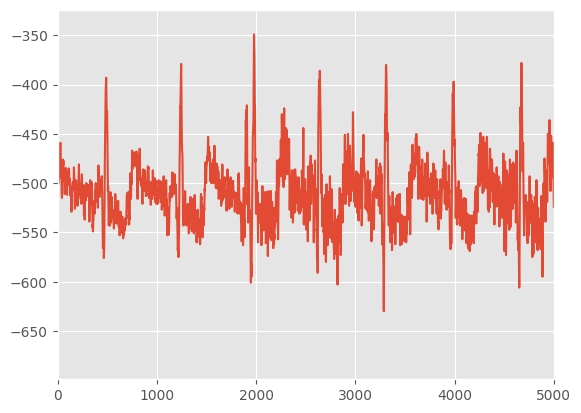

In [128]:
plotear(d_sensor1,0,5000)

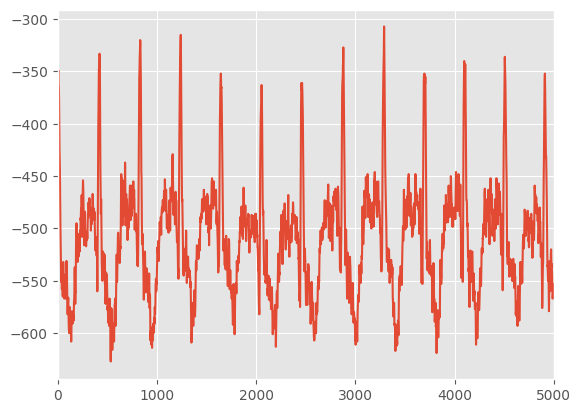

In [129]:
plotear(d_sensor2,0,5000)

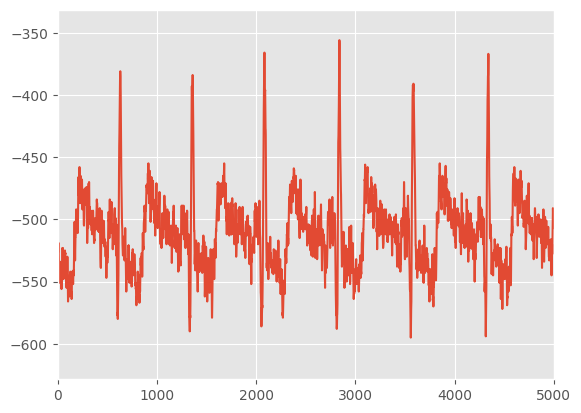

In [130]:
plotear(d_sensor3,0,5000)

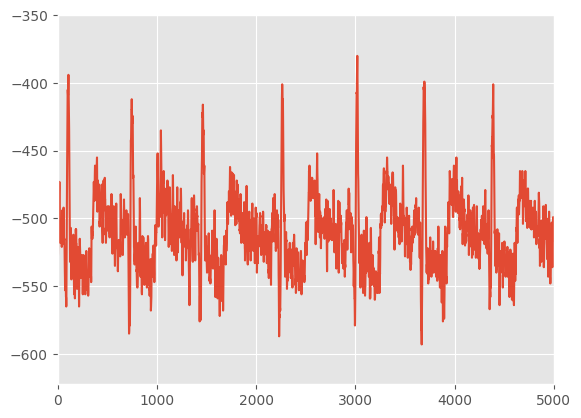

In [131]:
plotear(d_sensor4,0,5000)

## Especificar la Frecuencia de muestreo 

In [132]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs
n1 = np.arange(0,d_sensor1.shape[0])  # t = n*Ts
t1 = n1*Ts

n2 = np.arange(0,d_sensor2.shape[0])  # t = n*Ts
t2 = n2*Ts

n3 = np.arange(0,d_sensor3.shape[0])  # t = n*Ts
t3 = n3*Ts

n4 = np.arange(0,d_sensor4.shape[0])  # t = n*Ts
t4 = n4*Ts

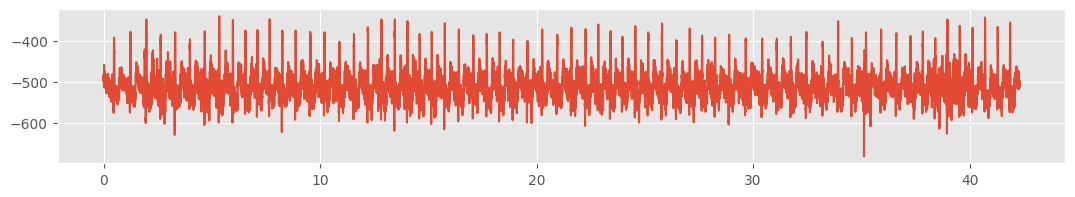

In [133]:
#Ploteamos la señal en el tiempo
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t1, d_sensor1)

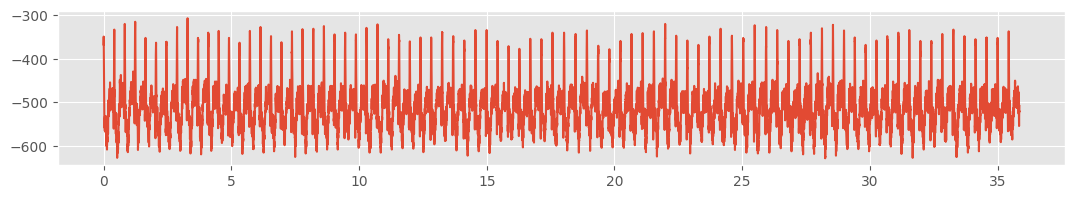

In [134]:
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t2, d_sensor2)

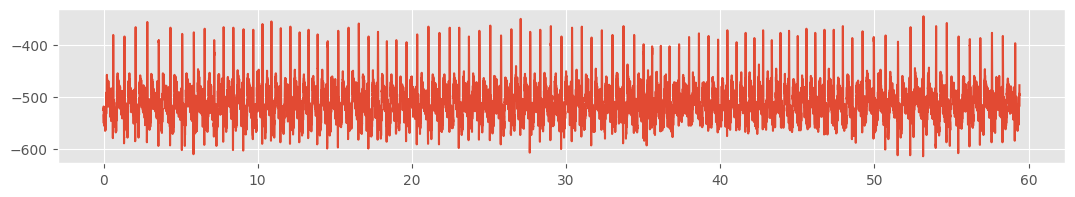

In [135]:
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t3, d_sensor3)

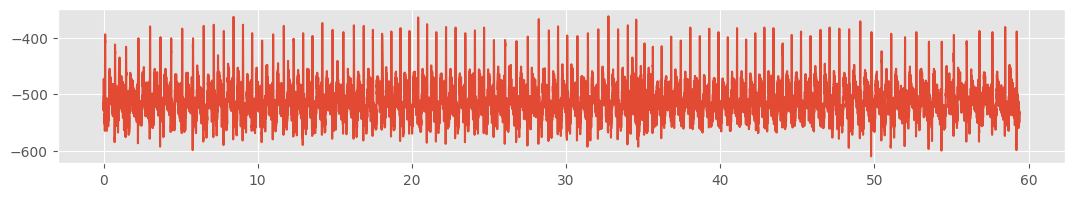

In [136]:
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t4, d_sensor4)

## Pasando el array a pandas para trabajarlo como series de tiempo

In [137]:
# Pase de array para trabajar como series de tiempo
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor1 = np.concatenate((t1.reshape(-1,1),  d_sensor1.reshape(-1,1)), axis=1)
st_sensor2 = np.concatenate((t2.reshape(-1,1),  d_sensor2.reshape(-1,1)), axis=1)
st_sensor3 = np.concatenate((t3.reshape(-1,1),  d_sensor3.reshape(-1,1)), axis=1)
st_sensor4 = np.concatenate((t4.reshape(-1,1),  d_sensor4.reshape(-1,1)), axis=1)

In [138]:
#Creamos el data frame con las varibles t y d_sensor
df1 = pd.DataFrame(st_sensor1, columns=["t","d_sensor1"])
df2 = pd.DataFrame(st_sensor2, columns=["t","d_sensor2"])
df3 = pd.DataFrame(st_sensor3, columns=["t","d_sensor3"])
df4 = pd.DataFrame(st_sensor4, columns=["t","d_sensor4"])
#df4.head()

In [139]:
#Establecemos t como index 
df1 = df1.set_index("t")
df2 = df2.set_index("t")
df3 = df3.set_index("t")
df4 = df4.set_index("t")
#df2.head()

(0.0, 2.0)

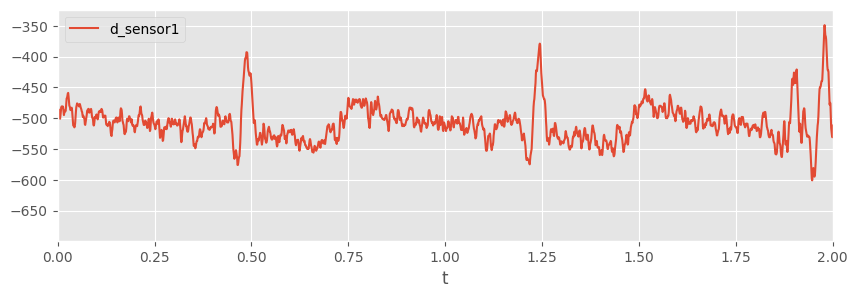

In [140]:
#Ploteamos la señal
df1.plot(figsize=(10,3))
plt.xlim(0,2)
#####plt.plot(df.index, df.loc[936])#######

(0.41, 0.84)

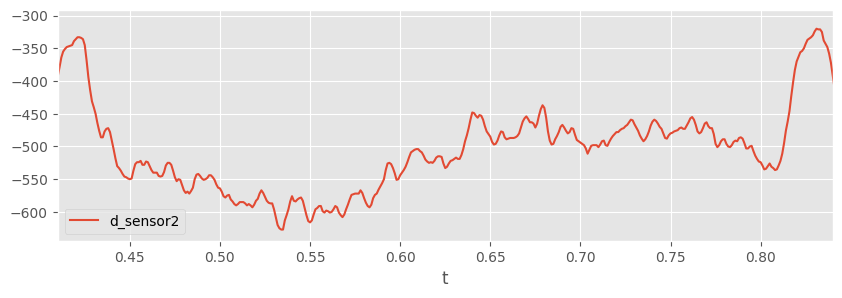

In [141]:
df2.plot(figsize=(10,3))
plt.xlim(0.41,0.84)

(0.0, 1.2)

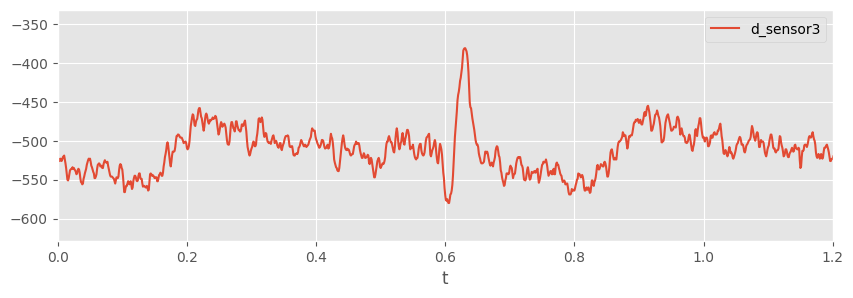

In [142]:
df3.plot(figsize=(10,3))
plt.xlim(0,1.2)

(1.0, 2.0)

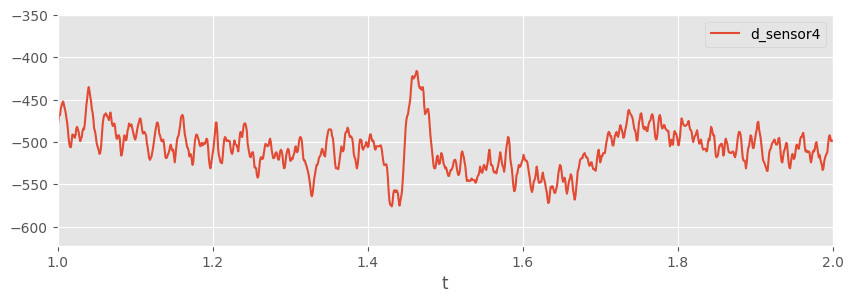

In [143]:
df4.plot(figsize=(10,3))
plt.xlim(1,2)

In [144]:
# Pase a data tabular con el estilo Sklearn
n1=df1.index.max()/1
s1=df1.shape[0]/60
print(n1,s1)

42.299 705.0


In [145]:
n2=df2.index.max()/1
s2=df2.shape[0]/35
print(n2,s2)

35.849000000000004 1024.2857142857142


In [146]:
n3=df3.index.max()/0.6
s3=df3.shape[0]/99
print(n3,s3)

98.99833333333333 600.0


In [147]:
n4=df4.index.max()/0.6
s4=df4.shape[0]/99
print(n4,s4)

98.99833333333333 600.0


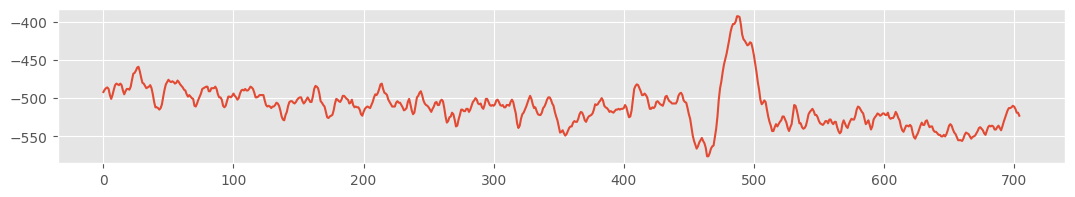

In [148]:
d_obs1 = df1[["d_sensor1"]].values.reshape(60,705)
plt.figure(figsize=(13,2))
plt.plot(d_obs1[0])


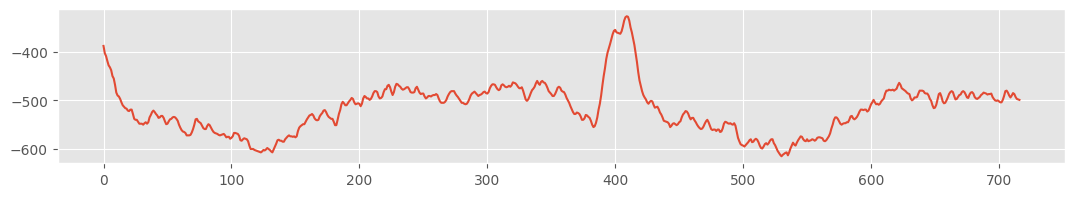

In [149]:
d_obs2 = df2[["d_sensor2"]].values.reshape(50,717)
plt.figure(figsize=(13,2))
plt.plot(d_obs2[8])

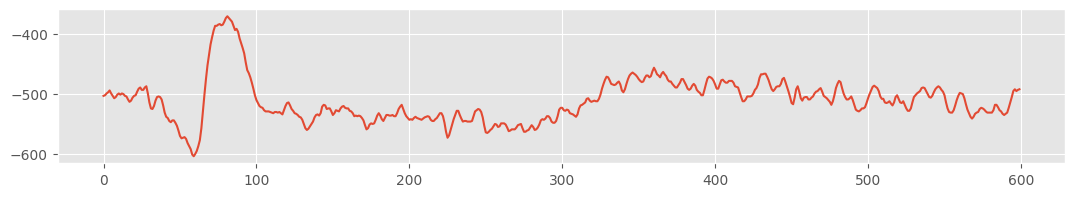

In [150]:
d_obs3 = df3[["d_sensor3"]].values.reshape(99,600)
plt.figure(figsize=(13,2))
plt.plot(d_obs3[15])

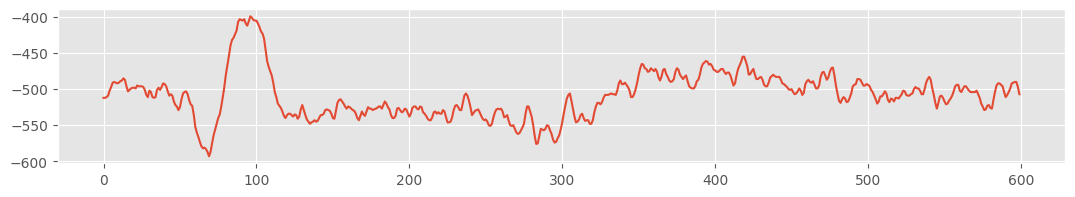

In [151]:
d_obs4 = df4[["d_sensor4"]].values.reshape(99,600)
plt.figure(figsize=(13,2))
plt.plot(d_obs4[6])

## Descripción de categoria de los ejercicios realizado en la clase de ECG

| Descripción | Categoria |
|----------|----------|
| Basal    | 1   |
| Post-Ejercicio    | 2   |
| Respiracion   | 3   | 
| RespiracionV2   | 4   | 



In [152]:
target_1=np.repeat(1,d_obs1.shape[0])
target_2=np.repeat(2,d_obs1.shape[0])
target_3=np.repeat(3,d_obs1.shape[0])
target_4=np.repeat(4,d_obs1.shape[0])

ecg={"1":[d_obs1,target_1],"2":[d_obs2,target_2],"3":[d_obs3,target_3],"4":[d_obs4,target_4]}
ecg


{'1': [array([[-492., -489., -487., ..., -519., -519., -523.],
         [-520., -519., -519., ..., -547., -540., -529.],
         [-527., -530., -535., ..., -529., -537., -545.],
         ...,
         [-543., -537., -529., ..., -545., -543., -545.],
         [-546., -546., -543., ..., -483., -485., -490.],
         [-492., -487., -482., ..., -502., -504., -507.]]),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])],
 '2': [array([[-367., -363., -356., ..., -498., -499., -493.],
         [-488., -484., -481., ..., -519., -521., -515.],
         [-509., -504., -495., ..., -569., -577., -577.],
         ...,
         [-375., -379., -372., ..., -480., -485., -492.],
         [-503., -502., -497., ..., -562., -574., -585.],
         [-584., -575., -567., ..., -516., -512., -508.]]),
  array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2